<a href="https://colab.research.google.com/github/olusegunadelowo/real_estate_prediction_project/blob/master/Real_Estate_Price_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[A] Libraries and Packages Importation**

In [1]:
# Import libraries
import matplotlib.pyplot as plt                                                     #For data vizualization
import warnings                                                                     #For silencing warning of deprecated libraries or modules
from glob import glob                                                               #For finding, locating, and searching for all of the files that are present in a system.

import pandas as pd                                                                 #For data wrangling and vizualization
import seaborn as sns                                                               #For data vizualization
import numpy as np
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact                   #For building interactive dashboard
from sklearn.impute import SimpleImputer                                            #For imputing missing values
from sklearn.linear_model import LinearRegression, Ridge                            #For building linear regression model
from sklearn.metrics import mean_absolute_error                                     #For determining the accuracy of the model
from sklearn.pipeline import make_pipeline                                          #For building model with simple imputer
from sklearn.preprocessing import OneHotEncoder                                     #For encoding the categorical variables
from sklearn.utils.validation import check_is_fitted
from sklearn. model_selection import train_test_split                               #For splitting the dataset into train and test
import plotly.express as px                                                         #For building more interactive dashboard

warnings.simplefilter(action="ignore", category=FutureWarning)                      #For silencing warning of deprecated libraries or modules

###**Importing the DataSet**

In [2]:
#Mounting the content of google drive (the content includes our dataset)
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#importing the dataset from google drive
df_train = pd.read_csv("/content/gdrive/MyDrive/Data Science Projects/Real_Estate_Prediction/Real_Estate_Price_Prediction_Model/properati-MX-2016-11-01-properties-sell.csv")
df_test = pd.read_csv("/content/gdrive/MyDrive/Data Science Projects/Real_Estate_Prediction/Real_Estate_Price_Prediction_Model/properati-AR-2016-11-01-properties-sell.csv")

<ipython-input-3-75eb3aa64e00>:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv("/content/gdrive/MyDrive/Data Science Projects/Real_Estate_Prediction/Real_Estate_Price_Prediction_Model/properati-AR-2016-11-01-properties-sell.csv")


#**[B] Data Preproccessing**

# **1. Data Wrangling/Munging/Cleaning**

In [4]:
#Checking the dimension of the dataset
df_train.shape

(150928, 24)

In [5]:
#Displaying first 3 rows/observations of the dataset to have a first glimpse of the content
df_train.head(3)

created_on operation property_type           place_name  \
0  2013-09-19      sell     apartment  Nuevo Centro Urbano   
1  2013-09-19      sell     apartment  Nuevo Centro Urbano   
2  2013-09-19      sell     apartment  Nuevo Centro Urbano   

                             place_with_parent_names  geonames_id  \
0  |México|Quintana Roo|Solidaridad|Playa del Car...          NaN   
1  |México|Quintana Roo|Solidaridad|Playa del Car...          NaN   
2  |México|Quintana Roo|Solidaridad|Playa del Car...          NaN   

                lat-lon        lat        lon     price  ...  \
0  20.627527,-87.076686  20.627527 -87.076686  269000.0  ...   
1  20.627567,-87.076718  20.627567 -87.076718  230000.0  ...   
2    20.6267,-87.075866  20.626700 -87.075866  135000.0  ...   

  surface_covered_in_m2  price_usd_per_m2  price_per_m2  floor  rooms  \
0                 110.0       2445.454545   2445.454545    NaN    NaN   
1                 110.0       2090.909091   2090.909091    NaN    NaN   
2                  41.0       3292.682927   3292.682927    NaN    NaN   

   expenses                                      properati_url  \
0       NaN  http://nuevo-centro-urbano.properati.com.mx/o6...   
1       NaN  http://nuevo-centro-urbano.properati.com.mx/o8...   
2       NaN  http://nuevo-centro-urbano.properati.com.mx/o9...   

                                         description  \
0  Referencia #28010. En el centro de Playa del C...   
1  Referencia #28925. En el centro de Playa del C...   
2  Referencia #29031. La Papaya un proyecto altam...   

                                               title  \
0  Departamento en Venta. Ref. #28010. 3 Dormitor...   
1  Departamento en Venta. Ref. #28925. 3 Dormitor...   
2  Departamento en Venta. Ref. #29031. 1 Dormitor...   

                                     image_thumbnail  
0  https://thumbs-cf.properati.com/3/q4Ws9xQT8Yu3...  
1  https://thumbs-cf.properati.com/8/7W4OI5hIXPdY...  
2  https://thumbs-cf.properati.com/0/4h1_ZbVNWly0...  

[3 rows x 24 columns]

In [6]:
#Checking the features, feature types, and missing values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150928 entries, 0 to 150927
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   created_on                  150928 non-null  object 
 1   operation                   150928 non-null  object 
 2   property_type               150928 non-null  object 
 3   place_name                  150928 non-null  object 
 4   place_with_parent_names     150928 non-null  object 
 5   geonames_id                 1 non-null       float64
 6   lat-lon                     124756 non-null  object 
 7   lat                         124756 non-null  float64
 8   lon                         124756 non-null  float64
 9   price                       149386 non-null  float64
 10  currency                    149386 non-null  object 
 11  price_aprox_local_currency  149386 non-null  float64
 12  price_aprox_usd             149386 non-null  float64
 13  surface_total_

In [7]:
#Check features/columns with more than 60% null value
df_train.isnull().sum() / len(df_train)

created_on                    0.000000
operation                     0.000000
property_type                 0.000000
place_name                    0.000000
place_with_parent_names       0.000000
geonames_id                   0.999993
lat-lon                       0.173407
lat                           0.173407
lon                           0.173407
price                         0.010217
currency                      0.010217
price_aprox_local_currency    0.010217
price_aprox_usd               0.010217
surface_total_in_m2           0.506520
surface_covered_in_m2         0.039290
price_usd_per_m2              0.583490
price_per_m2                  0.090401
floor                         0.837399
rooms                         0.967991
expenses                      0.999006
properati_url                 0.000000
description                   0.000000
title                         0.000000
image_thumbnail               0.028987
dtype: float64

In [8]:
#Dropping features/columns with more than 60% null value
df_train.drop(columns = ["geonames_id" , "floor" , "rooms" , "expenses"], inplace=True)

In [9]:
#Checking the number of categories in each of the categorical variables
df_train.select_dtypes("object").nunique()

created_on                    626
operation                       1
property_type                   4
place_name                   3885
place_with_parent_names      4114
lat-lon                     58494
currency                        3
properati_url              150928
description                147393
title                       89209
image_thumbnail             98798
dtype: int64

In [10]:
#Dropping very low and very high cardinality categorical features.Note:"place_with_parent_names" not dropped becuase it contains location information that is vital to our model.
df_train.drop(columns = ["created_on", "operation", "place_name", "lat-lon" , "properati_url", "description", "title", "image_thumbnail"], inplace=True)

In [11]:
#Re-checking the features and their types after modifications
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150928 entries, 0 to 150927
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   property_type               150928 non-null  object 
 1   place_with_parent_names     150928 non-null  object 
 2   lat                         124756 non-null  float64
 3   lon                         124756 non-null  float64
 4   price                       149386 non-null  float64
 5   currency                    149386 non-null  object 
 6   price_aprox_local_currency  149386 non-null  float64
 7   price_aprox_usd             149386 non-null  float64
 8   surface_total_in_m2         74480 non-null   float64
 9   surface_covered_in_m2       144998 non-null  float64
 10  price_usd_per_m2            62863 non-null   float64
 11  price_per_m2                137284 non-null  float64
dtypes: float64(9), object(3)
memory usage: 13.8+ MB


In [12]:
#Dropping leaky features.Features that repeat/contain the same information about other features
df_train.drop(columns = ["price","currency", "price_aprox_local_currency", "surface_total_in_m2","price_usd_per_m2"], inplace=True)

In [13]:
#Re-checking the the first 3 rows of the dataframe after modifications
df_train.head(3)

property_type                            place_with_parent_names        lat  \
0     apartment  |México|Quintana Roo|Solidaridad|Playa del Car...  20.627527   
1     apartment  |México|Quintana Roo|Solidaridad|Playa del Car...  20.627567   
2     apartment  |México|Quintana Roo|Solidaridad|Playa del Car...  20.626700   

         lon  price_aprox_usd  surface_covered_in_m2  price_per_m2  
0 -87.076686         269000.0                  110.0   2445.454545  
1 -87.076718         230000.0                  110.0   2090.909091  
2 -87.075866         135000.0                   41.0   3292.682927

In [14]:
#Re-checking the features and their types after modifications
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150928 entries, 0 to 150927
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   property_type            150928 non-null  object 
 1   place_with_parent_names  150928 non-null  object 
 2   lat                      124756 non-null  float64
 3   lon                      124756 non-null  float64
 4   price_aprox_usd          149386 non-null  float64
 5   surface_covered_in_m2    144998 non-null  float64
 6   price_per_m2             137284 non-null  float64
dtypes: float64(5), object(2)
memory usage: 8.1+ MB


In [15]:
#Extracting mexico states from place_with_parent_names
df_train["state"] = df_train["place_with_parent_names"].str.split("|" , expand=True)[2]
df_train.head(2)

property_type                            place_with_parent_names        lat  \
0     apartment  |México|Quintana Roo|Solidaridad|Playa del Car...  20.627527   
1     apartment  |México|Quintana Roo|Solidaridad|Playa del Car...  20.627567   

         lon  price_aprox_usd  surface_covered_in_m2  price_per_m2  \
0 -87.076686         269000.0                  110.0   2445.454545   
1 -87.076718         230000.0                  110.0   2090.909091   

          state  
0  Quintana Roo  
1  Quintana Roo

In [16]:
#Dropping place_with_parent_names feature.
df_train.drop(columns=["place_with_parent_names"], inplace=True)

In [17]:
#Re-checking the the first 3 rows of the dataframe after modifications
df_train.head(3)

property_type        lat        lon  price_aprox_usd  surface_covered_in_m2  \
0     apartment  20.627527 -87.076686         269000.0                  110.0   
1     apartment  20.627567 -87.076718         230000.0                  110.0   
2     apartment  20.626700 -87.075866         135000.0                   41.0   

   price_per_m2         state  
0   2445.454545  Quintana Roo  
1   2090.909091  Quintana Roo  
2   3292.682927  Quintana Roo

In [18]:
#Re-checking the dataframe features for possible missing values
#lat,	lon,	price_aprox_usd,	surface_covered_in_m2,	price_per_m2 features have missing values which needs to be dealt with
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150928 entries, 0 to 150927
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   property_type          150928 non-null  object 
 1   lat                    124756 non-null  float64
 2   lon                    124756 non-null  float64
 3   price_aprox_usd        149386 non-null  float64
 4   surface_covered_in_m2  144998 non-null  float64
 5   price_per_m2           137284 non-null  float64
 6   state                  150928 non-null  object 
dtypes: float64(5), object(2)
memory usage: 8.1+ MB


In [19]:
#Rename some features for easy identification
df_train["size[m2]"] = df_train["surface_covered_in_m2"]
df_train["price[USD]"] = df_train["price_aprox_usd"]
df_train.head(3)

property_type        lat        lon  price_aprox_usd  surface_covered_in_m2  \
0     apartment  20.627527 -87.076686         269000.0                  110.0   
1     apartment  20.627567 -87.076718         230000.0                  110.0   
2     apartment  20.626700 -87.075866         135000.0                   41.0   

   price_per_m2         state  size[m2]  price[USD]  
0   2445.454545  Quintana Roo     110.0    269000.0  
1   2090.909091  Quintana Roo     110.0    230000.0  
2   3292.682927  Quintana Roo      41.0    135000.0

In [20]:
#Drop remamed features
df_train.drop(columns=["surface_covered_in_m2"], inplace=True)
df_train.drop(columns=["price_aprox_usd"], inplace=True)

In [21]:
#Re-checking dataframe after remaming some features
df_train.head(3)

property_type        lat        lon  price_per_m2         state  size[m2]  \
0     apartment  20.627527 -87.076686   2445.454545  Quintana Roo     110.0   
1     apartment  20.627567 -87.076718   2090.909091  Quintana Roo     110.0   
2     apartment  20.626700 -87.075866   3292.682927  Quintana Roo      41.0   

   price[USD]  
0    269000.0  
1    230000.0  
2    135000.0

In [22]:
#Re-checking dataframe feature information after remaming some features.
#Note we have 2 categorical and 4 numeric features.Missing values are still present in these features lat,	lon,	price_aprox_usd,	surface_covered_in_m2,	price_per_m2
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150928 entries, 0 to 150927
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  150928 non-null  object 
 1   lat            124756 non-null  float64
 2   lon            124756 non-null  float64
 3   price_per_m2   137284 non-null  float64
 4   state          150928 non-null  object 
 5   size[m2]       144998 non-null  float64
 6   price[USD]     149386 non-null  float64
dtypes: float64(5), object(2)
memory usage: 8.1+ MB


# **2. Exploratory Data Analysis**
> As displayed in the cell above, there are 3 types of features in our dataset.They are `categorical`, `numerical` and `location` features. We shall visualize them to have a glipse of information they contain. Visualizing those features will help us gain deep insight of our dataset before we build our model




# **2.1 Univariate Data Analysis of Categorical Features in the Dataset**
> Our dataset contains 2 categorical features (`property_type` and `state`) as shown below







In [23]:
#Extracting only the categorical variables from the dataframe
df_train.select_dtypes("object").head()

property_type         state
0     apartment  Quintana Roo
1     apartment  Quintana Roo
2     apartment  Quintana Roo
3     apartment  Quintana Roo
4     apartment  Quintana Roo

In [24]:
#Checking the number of categories in each of the categorical variables
df_train.select_dtypes("object").nunique()

property_type     4
state            33
dtype: int64

## **2.1.1 Univariate Analysis of Categorical Feature `Property_Type`**

In [25]:
#Checking the exact categories of property types contained in our dataset
df_train["property_type"].unique()

array(['apartment', 'house', 'store', 'PH'], dtype=object)

In [26]:
#Checking numbers of different categories of property types contained in our dataset
#Note PH stands for PentHouse
df_train["property_type"].value_counts()

house        111065
apartment     36289
store          3553
PH               21
Name: property_type, dtype: int64

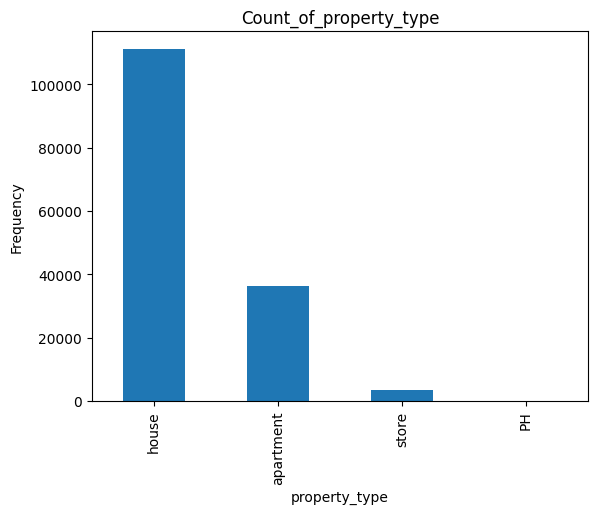

In [27]:
#Visualizing the number of different types of properties using pandas library
df_train["property_type"].value_counts().plot(kind="bar", xlabel="property_type", ylabel="Frequency",title = "Count_of_property_type");

**Inference**: As seen in bar chart above, the most patronized property types in Mexico states are `Houses` and `Apartments`

## **2.1.2 Univariate Analysis of Categorical Feature `State`**

In [28]:
#Checking different states contained in our dataset
df_train["state"].unique()

array(['Quintana Roo', 'Yucatán', 'Veracruz de Ignacio de la Llave',
       'Distrito Federal', 'Michoacán de Ocampo', 'Jalisco', 'Nayarit',
       'Oaxaca', 'Aguascalientes', 'Campeche', 'Morelos', 'Puebla',
       'Nuevo León', 'Coahuila de Zaragoza', 'Hidalgo', 'Chiapas',
       'Sonora', 'Querétaro', 'Baja California', 'Guanajuato', 'Sinaloa',
       'Guerrero', 'Zacatecas', 'Tamaulipas', 'Estado de México',
       'Colima', 'Tlaxcala', 'Durango', 'San Luis Potosí', 'Tabasco',
       'Baja California Sur', 'Chihuahua', 'Florida'], dtype=object)

In [29]:
#Checking different states contained in our dataset
df_train["state"].nunique()

33

### **Domain Knowledge**: According to [wikipedia](https://en.wikipedia.org/wiki/), Mexico has 32 states.But we are seeing 33 states in our dataset.After checking the wikipedia, it was discovered that Florida is not among the states of Mexico.It must have been mistakenly captured.We will go ahead and to exclude it.

In [30]:
#Exclude Florida from the list of state
df_train = df_train[df_train['state'] != 'Florida']

In [31]:
#Re-checking different states contained in our dataset
df_train["state"].nunique()

32

In [32]:
#Checking the exact number of states contained in our dataset
df_train["state"].value_counts()

Distrito Federal                   23472
Estado de México                   17078
Morelos                            11867
Yucatán                            11261
Nuevo León                         10609
Querétaro                          10484
Veracruz de Ignacio de la Llave    10050
Puebla                              7796
Jalisco                             5886
Quintana Roo                        5171
San Luis Potosí                     4196
Guerrero                            4114
Chiapas                             3696
Tamaulipas                          3685
Baja California                     3493
Sinaloa                             2715
Chihuahua                           2495
Guanajuato                          2239
Hidalgo                             1514
Baja California Sur                 1383
Aguascalientes                      1246
Tabasco                             1233
Sonora                              1109
Colima                              1055
Nayarit         

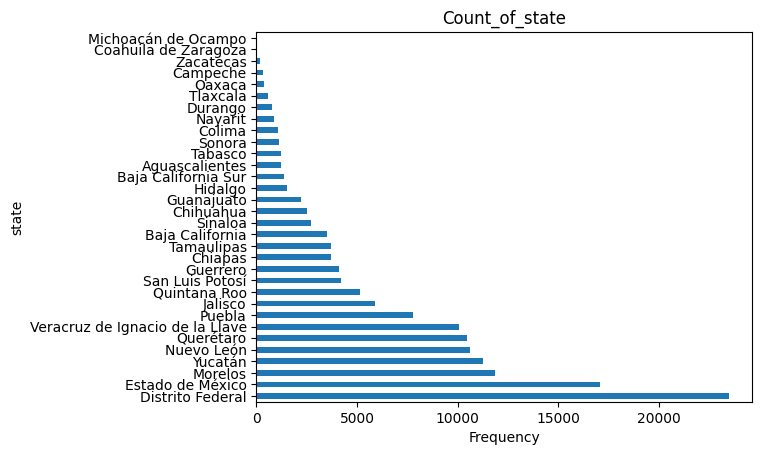

In [33]:
#Visualizing the count of states using pandas library
df_train["state"].value_counts().plot(kind="barh", xlabel="Frequency", ylabel="state",title = "Count_of_state");

**Inferences**:As seen in bar chart above,the 10 most represented states in our dataset are `Distrito
Federal`, `Estado de México`, `Morelos`,                        `Yucatán`             , `Nuevo León`                         ,
 `Querétaro`, `Veracruz de Ignacio de la Llave`    ,`Puebla`                          ,`Jalisco`, `Quintana Roo`  

# **2.2 Univariate Data Analysis of Numerical Features in the Dataset**

In [34]:
#Extract only the numeric variables from the dataframe
df_train.select_dtypes("number").head()
#There are 5 numerical features.Two of which are location features (lat and lon).
#Note: location features cannot be aggregated but can be represented on the map

lat        lon  price_per_m2  size[m2]  price[USD]
0  20.627527 -87.076686   2445.454545     110.0    269000.0
1  20.627567 -87.076718   2090.909091     110.0    230000.0
2  20.626700 -87.075866   3292.682927      41.0    135000.0
3  20.635482 -87.070345   1516.393443     122.0    185000.0
4  20.629092 -87.074658           NaN       NaN    180000.0

In [35]:
# Describing the statistics of the numeric features in the dataset.
df_train.describe()

lat            lon  price_per_m2      size[m2]    price[USD]
count  124755.000000  124755.000000  1.372840e+05  1.449980e+05  1.493850e+05
mean       21.045753     -99.135159  1.970136e+04  2.417371e+03  2.097984e+05
std         2.998990       5.212385  5.863548e+05  6.291732e+05  4.627160e+05
min        14.843818    -117.228632  1.137677e-02 -3.240000e+02  5.005210e+03
25%        19.312223    -100.442467  8.035714e+03  8.500000e+01  5.795513e+04
50%        19.877927     -99.226353  1.121369e+04  1.600000e+02  1.106679e+05
75%        21.286819     -98.315002  1.594617e+04  2.700000e+02  2.148555e+05
max        41.577487      99.206936  1.995000e+08  2.303030e+08  4.978873e+07

Note: From the statistics table above the statisitcal parameter which are count, mean, standard deviation(std):, minimum value(min), lower quartile(25%), median(middle quartile 50%), upper quartile (75%) and maximun value(max) are very large.That means there is presence of outliers

## **2.2.1 Univariate Analysis of Numerical Feature `size[m2]`**

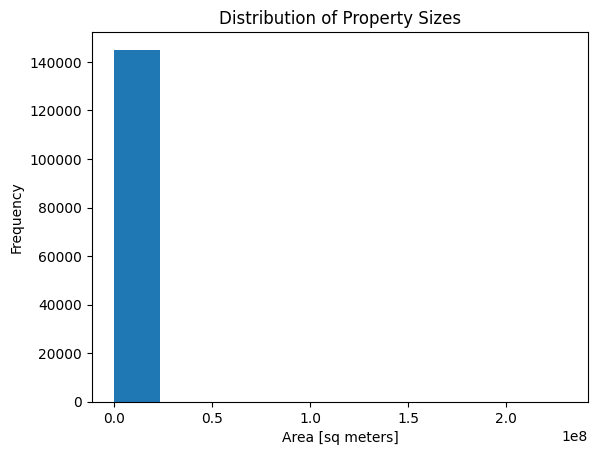

In [36]:
# Built a histogram to check how distribution of "size[m2]" feature looks like with matplotlib
plt.hist(df_train["size[m2]"])
# Label axes
plt.xlabel("Area [sq meters]")
plt.ylabel("Frequency")
# Add title
plt.title("Distribution of Property Sizes");

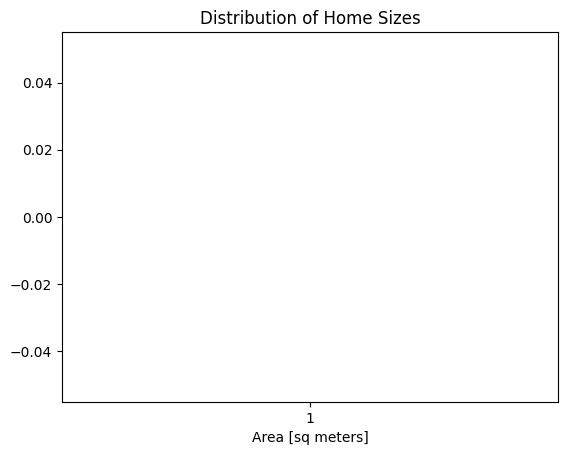

In [37]:
# Built a box plot check how distribution of "size[m2]" looks like with matplotlib
plt.boxplot(df_train["size[m2]"])
# Label x-axis
plt.xlabel("Area [sq meters]")
# Add title
plt.title("Distribution of Home Sizes");

From the histogram and boxplot above, it could be deduced that there is a presence of outliers in the feature "size[m2]" as earlier guessed.

In order to remove the outliers, we can trim the bottom and top 10% of values of "size[m2]" feature.This will get rid of the outlier



In [38]:
#Removing the outlier from "size[m2]" variable
low, high = df_train["size[m2]"].quantile([0.1 , 0.9])
mask_area = df_train["size[m2]"].between(low, high)
df_train = df_train[mask_area]
df_train.head()

property_type        lat        lon  price_per_m2         state  size[m2]  \
0     apartment  20.627527 -87.076686   2445.454545  Quintana Roo     110.0   
1     apartment  20.627567 -87.076718   2090.909091  Quintana Roo     110.0   
3     apartment  20.635482 -87.070345   1516.393443  Quintana Roo     122.0   
5     apartment  20.621580 -87.092398  10236.220472  Quintana Roo     127.0   
6     apartment  20.630723 -87.073113   1112.000000  Quintana Roo     125.0   

   price[USD]  
0   269000.00  
1   230000.00  
3   185000.00  
5    85655.92  
6   139000.00

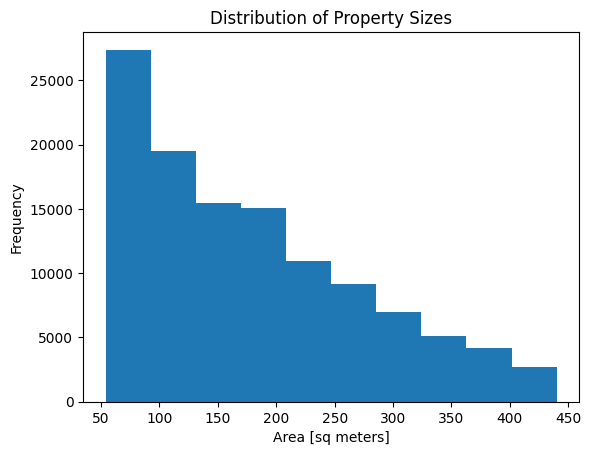

In [39]:
# Re-build a histogram to check how distribution of "size[m2]" looks like with matplotlib after trimming
plt.hist(df_train["size[m2]"])
# Label axes
plt.xlabel("Area [sq meters]")
plt.ylabel("Frequency")
# Add title
plt.title("Distribution of Property Sizes");

Text(0.5, 1.0, 'Distribution of Home Sizes')

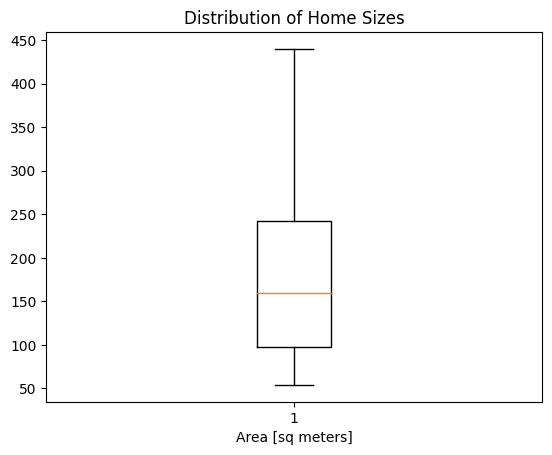

In [40]:
# Build box plot check how distribution of "size[m2]" looks like with matplotlib after trimming
plt.boxplot(df_train["size[m2]"])
# Label x-axis
plt.xlabel("Area [sq meters]")
# Add title
plt.title("Distribution of Home Sizes")

<ipython-input-41-cd4f072d8100>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train["size[m2]"]);


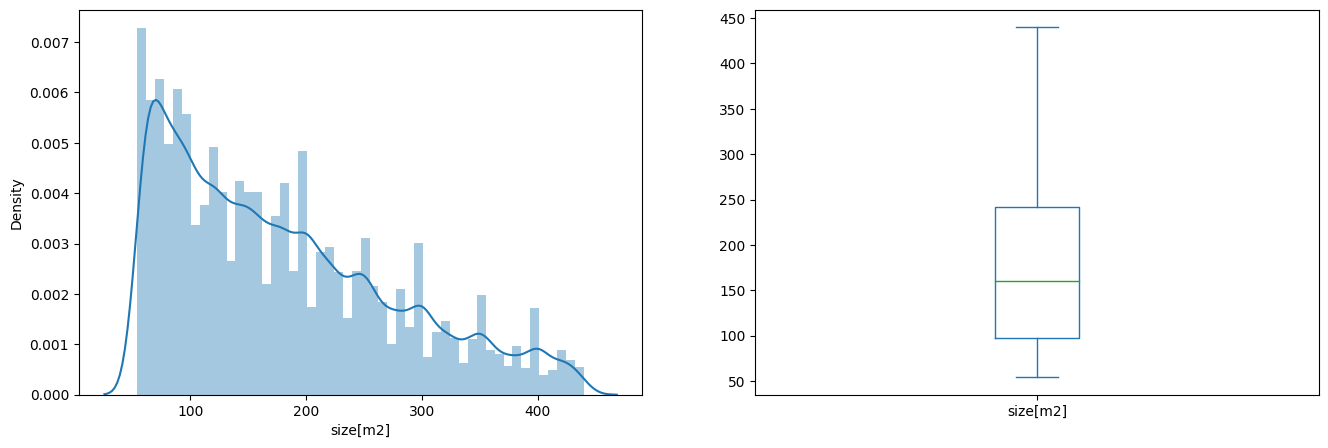

In [41]:
# Build diskplot and boxplot check how distribution of "size[m2]" looks like with matplotlib
plt.figure(figsize=[16,5])
plt.subplot(121)
sns.distplot(df_train["size[m2]"]);
plt.subplot(122)
df_train["size[m2]"].plot.box(figsize=(16,5))
plt.show()

**Inference**: From the histogram, boxplots and disk plot above, we could see that our size[m2] feature is not a normal distribution.It is a right-skewed distribution.In order to make the distribution near uniform, we will apply log transformation on the skewed features later during feature engineering.

## **2.2.2 Univariate Analysis of Numerical Feature `price[USD]`**

Text(0.5, 1.0, 'Distribution of the  home price')

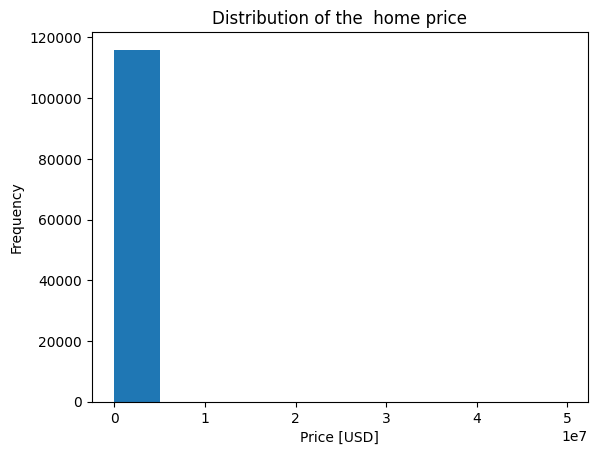

In [42]:
# Build histogram to check how the distribution of "price[USD]" looks like with matplotlib
plt.hist(df_train["price[USD]"])
# Label axes
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")
# Add title
plt.title("Distribution of the  home price")

Again,from the histogram above, it could be deduced that there is a presence of outliers in the feature "Price[USD]" as earlier guessed.

In order to remove the outliers, we can trim the bottom and top 10% of values of "Price[USD]" feature.This will get rid of the outlier


In [43]:
#Removing the outlier from "price[USD]" variable
low, high = df_train["price[USD]"].quantile([0.1 , 0.9]) #One the methods of removing outliers called Winsorization
mask_area = df_train["price[USD]"].between(low, high)
df_train = df_train[mask_area]

In [44]:

df_train.describe()

lat           lon   price_per_m2      size[m2]     price[USD]
count  77549.000000  77549.000000   93087.000000  93087.000000   93087.000000
mean      20.846031    -98.923968   13318.792631    177.716534  118078.205883
std        2.844290      5.145727    8083.415580     88.288857   64046.380337
min       14.872895   -117.228632     132.132132     54.000000   34246.210000
25%       19.272230   -100.423952    8986.773333    105.000000   65873.720000
50%       19.643876    -99.209285   11473.684211    160.000000  102738.640000
75%       21.082655    -98.250015   14975.000000    233.000000  157986.790000
max       33.213187    -86.745736  101851.851852    440.000000  294253.860000

Text(0.5, 1.0, 'Distribution of the  home price')

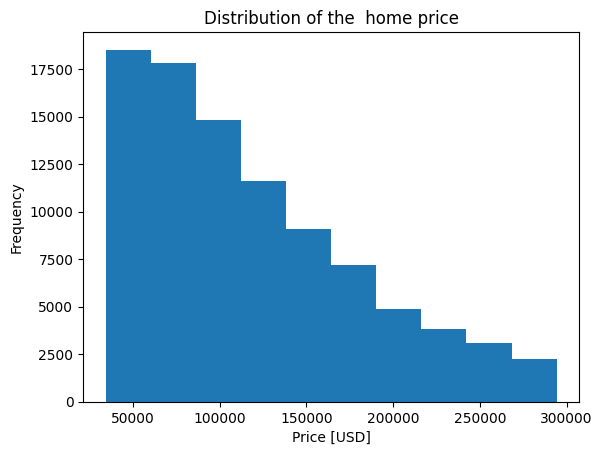

In [45]:
# Build histogram to check how distribution looks like with matplotlib
plt.hist(df_train["price[USD]"])
# Label axes
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")
# Add title
plt.title("Distribution of the  home price")

Text(0.5, 1.0, 'Distribution of Property Prices')

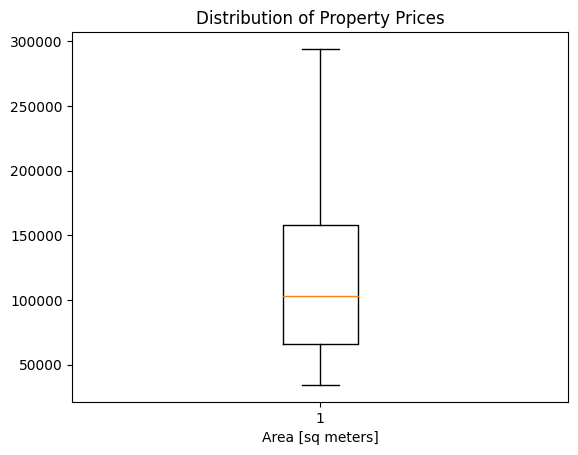

In [46]:
# Build box plot
plt.boxplot(df_train["price[USD]"])
# Label x-axis
plt.xlabel("Area [sq meters]")
# Add title
plt.title("Distribution of Property Prices")

<ipython-input-47-b84bb9210e17>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train["price[USD]"]);


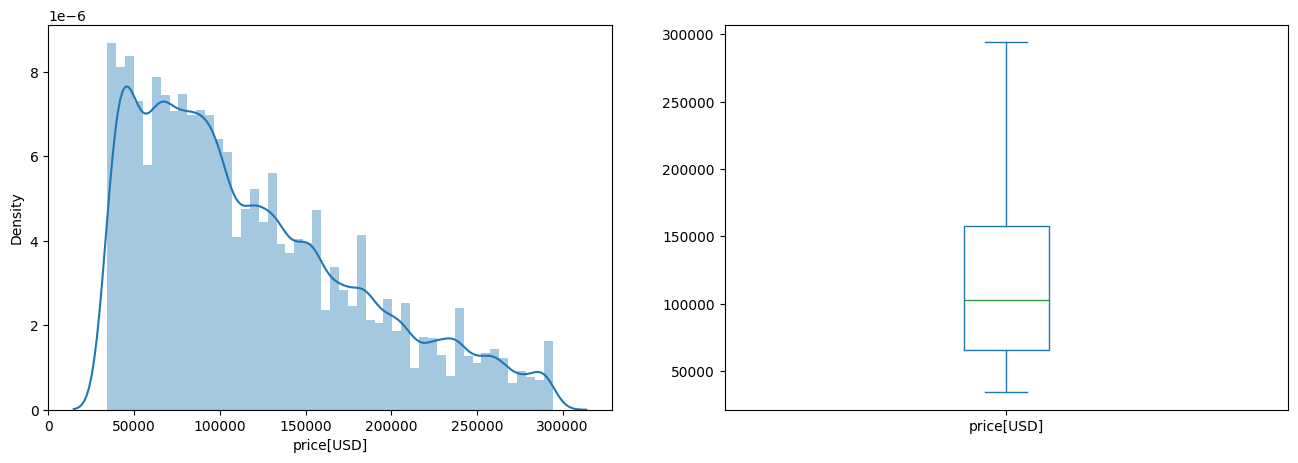

In [47]:
# Build distplot and boxplot check how distribution of "price[USD]" looks like with matplotlib
plt.figure(figsize=[16,5])
plt.subplot(121)
sns.distplot(df_train["price[USD]"]);
plt.subplot(122)
df_train["price[USD]"].plot.box(figsize=(16,5))
plt.show()

**Inference**: From the histogram, boxplots and disk plot above, we could see that our price[USD] feature is not a normal distribution.It is a right-skewed distribution.In order to make the distribution near uniform, we will apply log transformation on the price[USD] feature later during feature engineering.

# **2.3 Univariate Data Analysis of Location Feature in the Dataset**

In [48]:
fig = px.scatter_mapbox(
    df_train,  # Our DataFrame
    lat="lat",
    lon="lon",
    center={"lat": 19.43, "lon": -99.13},  # Map will be centered on Mexico City
    width=900,  # Width of map
    height=600,  # Height of map
    hover_data=["price[USD]", "size[m2]", "state"],  # Display price, area_m2 and state when hovering mouse over house
)
fig.update_layout(mapbox_style="open-street-map")

fig.show()

# **2.4 Bivariate Data Analysis of Numerical Feature vs Numerical Feature in the Dataset**

## **2.4.1 Bivariate Analysis Numeric Feature `size[m]` vs Numeric Feature `price[usd]`**

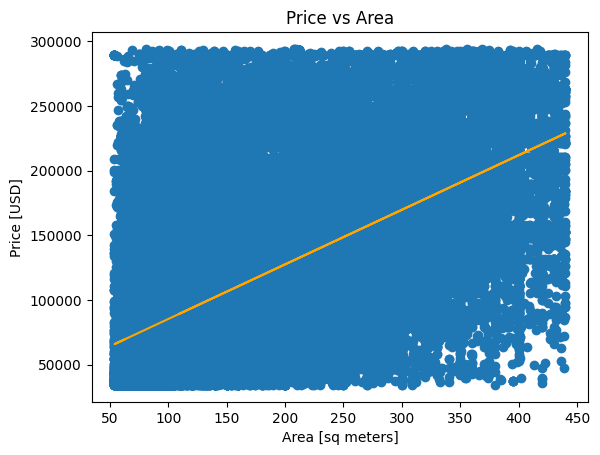

In [49]:
#Bivariate Analysis Numeric Feature (size) vs Numeric Feature(price_usd) with scatter plot
import numpy as np
plt.scatter(x = df_train["size[m2]"] , y = df_train["price[USD]"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Price vs Area");
z = np.polyfit(df_train["size[m2]"], df_train["price[USD]"], 1)
p = np.poly1d(z)
plt.plot(df_train["size[m2]"], p(df_train["size[m2]"]), color = "orange");

In [50]:
#Checking correlation between property sizes and property prices
p_correlation = df_train["size[m2]"].corr(df_train["price[USD]"]).round(2)
print(p_correlation)

0.58


**Inference**: There is good or positive correlation between property sizes and property prices.Thus sizes of the properties determines the properties' prices

# **2.5 Bivariate Data Analysis of Categorical Feature  vs Numerical Feature in the Dataset**

## **2.5.1 Bivariate Analysis Categorical Feature `state` vs Numeric Feature `price[usd]`**

In [51]:
#Bivariate Analysis Categorical Feature (state) vs Numeric Feature (price_usd)
mean_price_by_state = df_train.groupby("state")["price[USD]"].mean().round(2).sort_values(ascending=False)
mean_price_by_state

state
Quintana Roo                       154316.08
Puebla                             138533.65
Baja California Sur                134202.62
Nuevo León                         129305.43
Querétaro                          129284.54
Morelos                            124945.29
Oaxaca                             121592.70
Distrito Federal                   120809.85
Jalisco                            118751.03
Guanajuato                         117825.27
Estado de México                   117224.28
Yucatán                            114935.33
San Luis Potosí                    111645.95
Tabasco                            110737.01
Campeche                           109681.77
Chihuahua                          109619.49
Sinaloa                            108136.24
Guerrero                           107350.59
Sonora                             107323.50
Veracruz de Ignacio de la Llave    106636.78
Nayarit                            102727.62
Chiapas                             99501.00
Tama

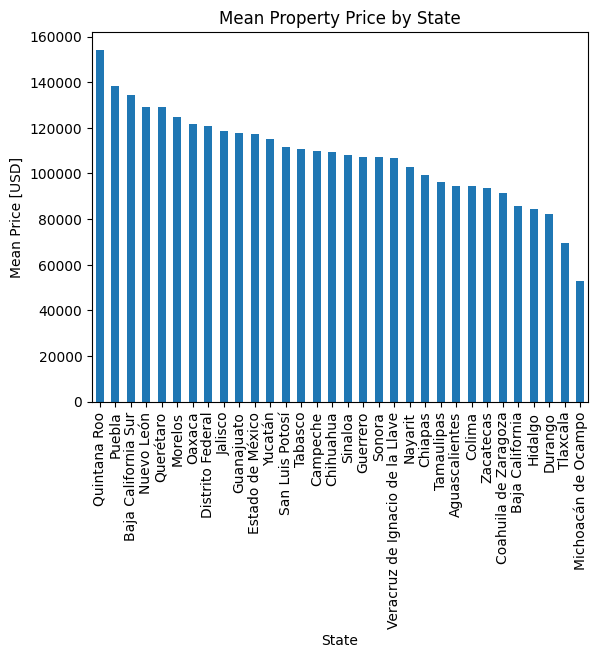

In [52]:
mean_price_by_state.plot(kind="bar" ,
                          xlabel = "State",
                          ylabel = "Mean Price [USD]" ,
                          title = "Mean Property Price by State"
);

### **Inference**: Quintana Roo listed as most expensive city contradicts the information we have in the  [recent GDP numbers](https://en.wikipedia.org/wiki/List_of_Mexican_states_by_GDP), whereas it's not in the top 10 state economies. With all the variations in house sizes across states, a better metric to look at would be price per m2. In order to do that, we need to create a new column.

## **2.5.2 Bivariate Analysis Categorical `state` vs Numeric `price_usd_per_m2`**

In [53]:
#Bivariate Analysis Categorical vs Numeric (state vs price_usd_per_m2)
mean_of_price_per_m2 = df_train.groupby("state")["price_per_m2"].mean().sort_values(ascending=False).round(2)
mean_of_price_per_m2

state
Distrito Federal                   22017.50
Puebla                             14221.45
Estado de México                   13594.06
Guerrero                           13500.20
Nuevo León                         13439.44
Jalisco                            13231.35
Querétaro                          12731.62
Oaxaca                             12647.38
Tabasco                            12460.95
Morelos                            12380.19
Campeche                           12337.90
Michoacán de Ocampo                11666.67
Nayarit                            10976.49
Quintana Roo                       10976.29
San Luis Potosí                    10899.66
Chiapas                            10898.62
Sinaloa                            10417.72
Veracruz de Ignacio de la Llave    10276.89
Yucatán                            10268.36
Zacatecas                          10196.92
Tamaulipas                          9765.27
Guanajuato                          9708.19
Chihuahua                 

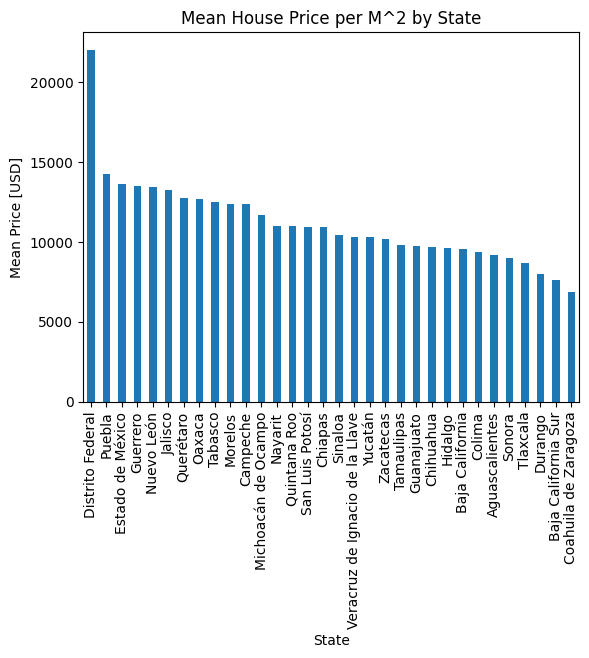

In [54]:
mean_of_price_per_m2.plot(kind="bar" ,
                          xlabel = "State",
                          ylabel = "Mean Price [USD]" ,
                          title = "Mean House Price per M^2 by State"
);

Now we see that the capital Mexico City (Distrito Federal) is by far the most expensive market. Additionally, many of the top 10 states by GDP are also in the top 10 most expensive real estate markets. So it looks like this bar chart is a more accurate reflection of state real estate market in Mexico.We can also infer that location of the property has effect on its prices.

## **2.5.3  Bivariate Analysis Categorical Feature `property_type` vs Numeric Feature `price[usd]`**

In [55]:
#Bivariate Analysis Categorical Feature (property_type) vs Numeric Feature (price_usd)
mean_price_by_property_type = df_train.groupby("property_type")["price[USD]"].mean().round(2).sort_values(ascending=False)
mean_price_by_property_type

property_type
PH           162915.43
store        122037.70
apartment    118739.89
house        117791.08
Name: price[USD], dtype: float64

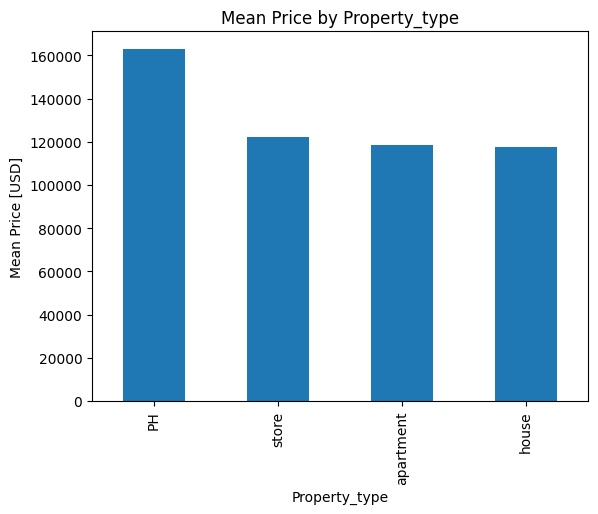

In [56]:
mean_price_by_property_type.plot(kind="bar" ,
                          xlabel = "Property_type",
                          ylabel = "Mean Price [USD]" ,
                          title = "Mean Price by Property_type"
);

**Inference**: PH(PentHouse) is the most expensive property in Mexico

# **[C] Data Processing**

# **1. Feature Engineering**

## **1.1 Feature Selection(Correlation matrix Method)**
> Here we select non-multicolinear features i.e features that are not highly correlated with each other using correlation matrix method)



<Axes: >

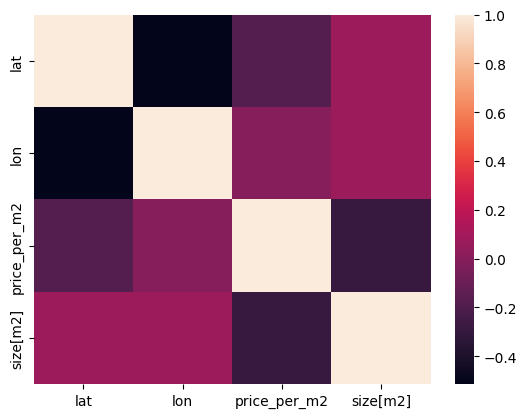

In [57]:
#Check categorical features with multicolinearity and drop if any
corr = df_train.select_dtypes("number").drop(columns = "price[USD]").corr() #dropped target variable "price[USD]" first
sns.heatmap(corr)

**Inference**: There is no features with multicolinearity (occurrence of high intercorrelations among two or more independent variables).That means the for features `lat`, `lon`, `price_per_m2` and `size[m2]` would be good enough to predict the price[usd] of the estates in Mexico.




## **1.2 Feature Transformation**







## **1.2.1 Converting categorical variables to dummy features containing zeros and ones**
Remember we have 2 categorical features that made it up to this point."property_type" and "state". Machine Learning(ML) Algorithms can not made prediction with categorical features. We will create dummy features which contains zeros and ones out of them so that ML algorithm can learn from  them.The two categorical variables are nominal so we use One-Hot Encoding. One-Hot Encoding is the process of creating dummy variables. This technique is used for categorical variables where order does not matter. One-Hot encoding technique is used when the features are nominal(do not have any order).If the categorical variable were to be ordinal(categories with order) we have to sue Label-Encoding instead.

In [58]:
# Converted categorical variables to dummies variable with one-hot encoding
df_train = pd.get_dummies(df_train)
df_train.head()

lat        lon  price_per_m2  size[m2]  price[USD]  property_type_PH  \
0  20.627527 -87.076686   2445.454545     110.0   269000.00                 0   
1  20.627567 -87.076718   2090.909091     110.0   230000.00                 0   
3  20.635482 -87.070345   1516.393443     122.0   185000.00                 0   
5  20.621580 -87.092398  10236.220472     127.0    85655.92                 0   
6  20.630723 -87.073113   1112.000000     125.0   139000.00                 0   

   property_type_apartment  property_type_house  property_type_store  \
0                        1                    0                    0   
1                        1                    0                    0   
3                        1                    0                    0   
5                        1                    0                    0   
6                        1                    0                    0   

   state_Aguascalientes  ...  state_Quintana Roo  state_San Luis Potosí  \
0                     0  ...                   1                      0   
1                     0  ...                   1                      0   
3                     0  ...                   1                      0   
5                     0  ...                   1                      0   
6                     0  ...                   1                      0   

   state_Sinaloa  state_Sonora  state_Tabasco  state_Tamaulipas  \
0              0             0              0                 0   
1              0             0              0                 0   
3              0             0              0                 0   
5              0             0              0                 0   
6              0             0              0                 0   

   state_Tlaxcala  state_Veracruz de Ignacio de la Llave  state_Yucatán  \
0               0                                      0              0   
1               0                                      0              0   
3               0                                      0              0   
5               0                                      0              0   
6               0                                      0              0   

   state_Zacatecas  
0                0  
1                0  
3                0  
5                0  
6                0  

[5 rows x 41 columns]

In [59]:
#Check the newly created dummy features
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93087 entries, 0 to 150925
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   lat                                    77549 non-null  float64
 1   lon                                    77549 non-null  float64
 2   price_per_m2                           93087 non-null  float64
 3   size[m2]                               93087 non-null  float64
 4   price[USD]                             93087 non-null  float64
 5   property_type_PH                       93087 non-null  uint8  
 6   property_type_apartment                93087 non-null  uint8  
 7   property_type_house                    93087 non-null  uint8  
 8   property_type_store                    93087 non-null  uint8  
 9   state_Aguascalientes                   93087 non-null  uint8  
 10  state_Baja California                  93087 non-null  uint8  
 11  s



```
# This is formatted as code
```

## **1.2.2 Logarithm (Log) Transformation/Normalization**
Here, we perform the  log transformation of skewed numeric variables(Non-normally distributed variables) due to the presence outliers.This method will completely normalize the numeric fueatures against the impact of the outliers

<Axes: >

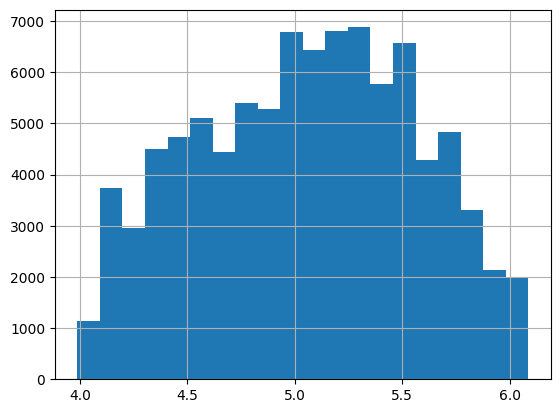

In [60]:
#Log transformation of the "size[m2]" skewed distribution
df_train["size[m2]"] = np.log(df_train["size[m2]"])
df_train["size[m2]"].hist(bins=20)

<ipython-input-61-cd4f072d8100>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




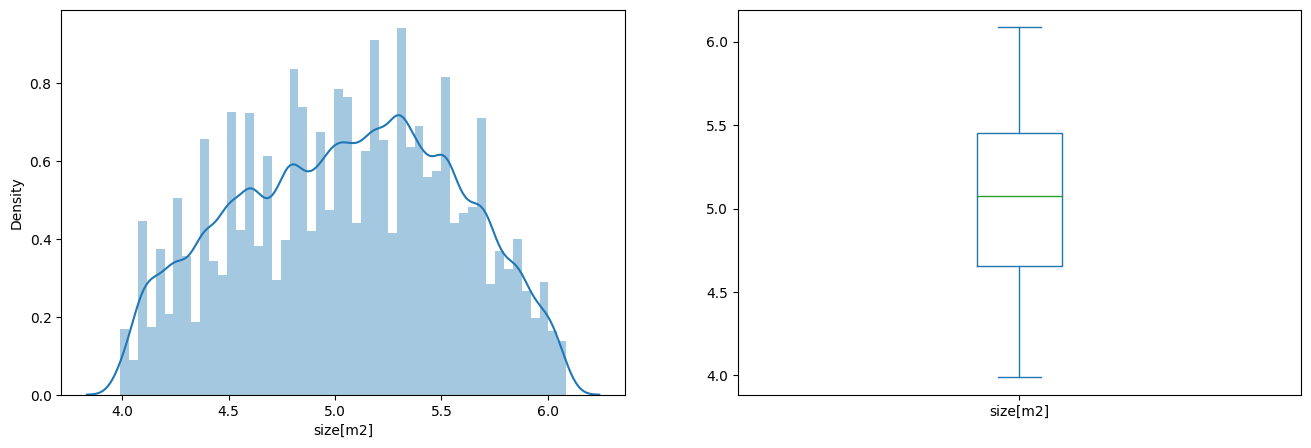

In [61]:
# Build diskplot and boxplot check how distribution of "size[m2]" looks like with matplotlib
plt.figure(figsize=[16,5])
plt.subplot(121)
sns.distplot(df_train["size[m2]"]);
plt.subplot(122)
df_train["size[m2]"].plot.box(figsize=(16,5))
plt.show()

<Axes: >

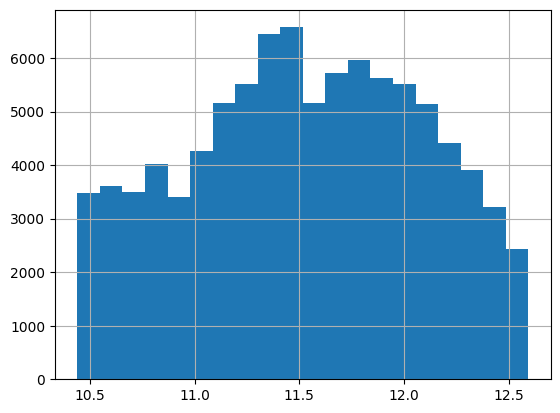

In [62]:
#Log transformation of the ""price[USD]"" skewed distribution
df_train["price[USD]"] = np.log(df_train["price[USD]"])
df_train["price[USD]"].hist(bins=20)

<ipython-input-63-5c21e7ad8bd9>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: >

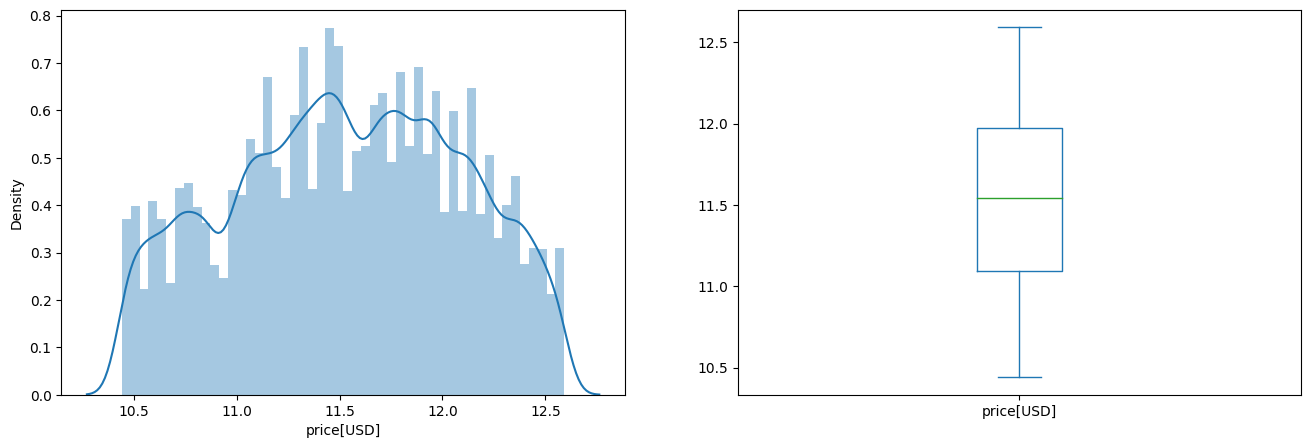

In [63]:
# Build diskplot and boxplot check how distribution of "price[USD]" looks like with matplotlib
plt.figure(figsize=[16,5])
plt.subplot(121)
sns.distplot(df_train["price[USD]"]);
plt.subplot(122)
df_train["price[USD]"].plot.box(figsize=(16,5))
#plt.show()

# **2 Data Splitting 1**
> At this stage ,the dataset is splitted to feature `matrix X` (X_train) and `target vector y` (y_train)




In [64]:
target  = "price[USD]"
features = ['lat', 'lon', 'price_per_m2', 'size[m2]',
       'property_type_PH', 'property_type_apartment', 'property_type_house',
       'property_type_store', 'state_Aguascalientes', 'state_Baja California',
       'state_Baja California Sur', 'state_Campeche', 'state_Chiapas',
       'state_Chihuahua', 'state_Coahuila de Zaragoza', 'state_Colima',
       'state_Distrito Federal', 'state_Durango', 'state_Estado de México',
       'state_Guanajuato', 'state_Guerrero', 'state_Hidalgo', 'state_Jalisco',
       'state_Morelos', 'state_Nayarit', 'state_Nuevo León', 'state_Oaxaca',
       'state_Puebla', 'state_Querétaro', 'state_Quintana Roo',
       'state_San Luis Potosí', 'state_Sinaloa', 'state_Sonora',
       'state_Tabasco', 'state_Tamaulipas', 'state_Tlaxcala',
       'state_Veracruz de Ignacio de la Llave', 'state_Yucatán',
       'state_Zacatecas']
X_train = df_train[features]  #feature matrix X
y_train = df_train[target]   #Target vector y

# **3 Treating Missing Values**

In [65]:
#treating missing values in X_train (indenpendent features)
imputer = SimpleImputer()
imputer.fit(X_train)
XT_train = imputer.transform(X_train)
pd.DataFrame(XT_train, columns=X_train.columns).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93087 entries, 0 to 93086
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   lat                                    93087 non-null  float64
 1   lon                                    93087 non-null  float64
 2   price_per_m2                           93087 non-null  float64
 3   size[m2]                               93087 non-null  float64
 4   property_type_PH                       93087 non-null  float64
 5   property_type_apartment                93087 non-null  float64
 6   property_type_house                    93087 non-null  float64
 7   property_type_store                    93087 non-null  float64
 8   state_Aguascalientes                   93087 non-null  float64
 9   state_Baja California                  93087 non-null  float64
 10  state_Baja California Sur              93087 non-null  float64
 11  st

In [66]:
#treating missing values in y_train (Dependent feature)
y_train.fillna(y_train.mean(), inplace=True)
y_train

0         12.502467
1         12.345835
3         12.128111
5         11.358094
6         11.842229
            ...    
150919    12.220187
150921    11.414438
150922    11.324463
150923    11.775290
150925    10.820821
Name: price[USD], Length: 93087, dtype: float64

# **4 Data Splitting 2**

In [67]:
# Split dataset by 75% (X_train, y_train) to train dataset and 25% (X_val, y_val) to validate dataset
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state= 8)

# **[D] Modelling**

In [68]:
#Baseline Mean Absolute Error
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Mean apartment price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apartment price 11.53
Baseline MAE: 0.47


In [69]:
model = make_pipeline(SimpleImputer(), Ridge())
model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

In [70]:
y_pred_val = model.predict(X_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
print("Validation Mean Absolute Error:", round(mae_val, 2))

Validation Mean Absolute Error: 0.16


In [71]:
def make_prediction(area, lat, lon, property_type , state):
    data = {"surface_covered_in_m2":area,
           "lat":lat,
           "lon":lon,
           "property_type":property_type , "state":state}
    df = pd.DataFrame(data, index = [0])
    prediction = model.predict(y_train).round(2)
    return f"Predicted apartment price: ${prediction}"

In [76]:
#make_prediction(400, -10.4, -12.9, "house" , "Distrito Federal")

In [74]:
#Testing model on a new dataset
#features = df_test.columns
#X_test = df_test[features]
#y_pred_test = pd.Series(model.predict(X_test))
#y_pred_test.head()